<a href="https://colab.research.google.com/github/DGkurnia/discuss1/blob/main/regtra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Python Libary Insertion
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#dataset preparation
#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
#House Price in Dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])
#regression line
%matplotlib inline
plt.scatter(bedrooms, house_price)

In [ ]:
#model training
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)
#linear incorporation
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

Unsupervised learning
(K-means clustering)

In [ ]:
#libary preparation
import pandas as pd
from sklearn.cluster import KMeans #K-means
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#file upload
from google.colab import drive
drive.mount('/content/drive')
#csv update
df = pd.read_csv("/content/mall.csv")
#df.head(10)

preproccessing

In [6]:
#first step
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# ubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
"""
# tampilkan data yang sudah di preprocess
df.head(3)
"""
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Continuation

In [ ]:
#inertia chart
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

cluster segmentation

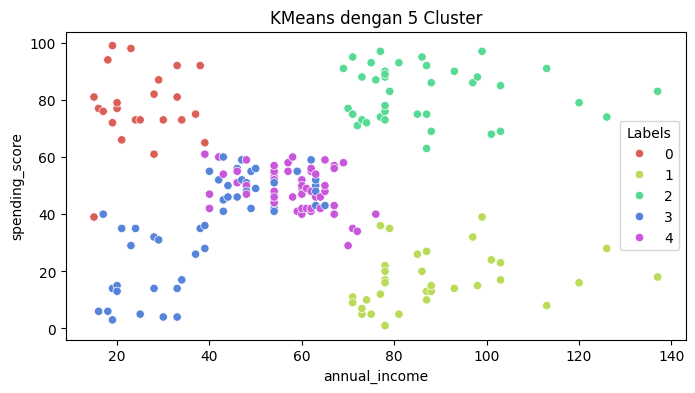

In [8]:
#final input
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()